<a href="https://colab.research.google.com/github/SreeramAdari/Data_Science_Assignmnents/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

Mis

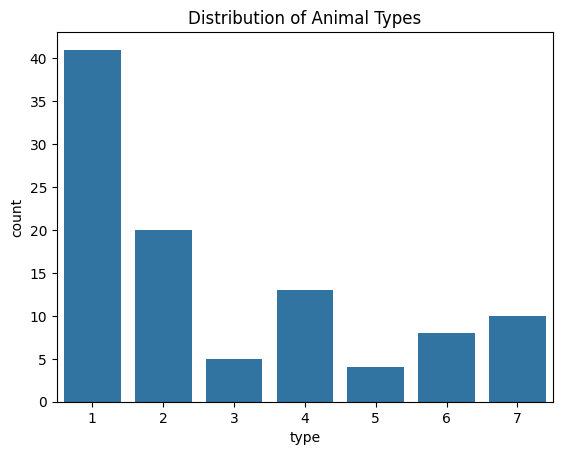

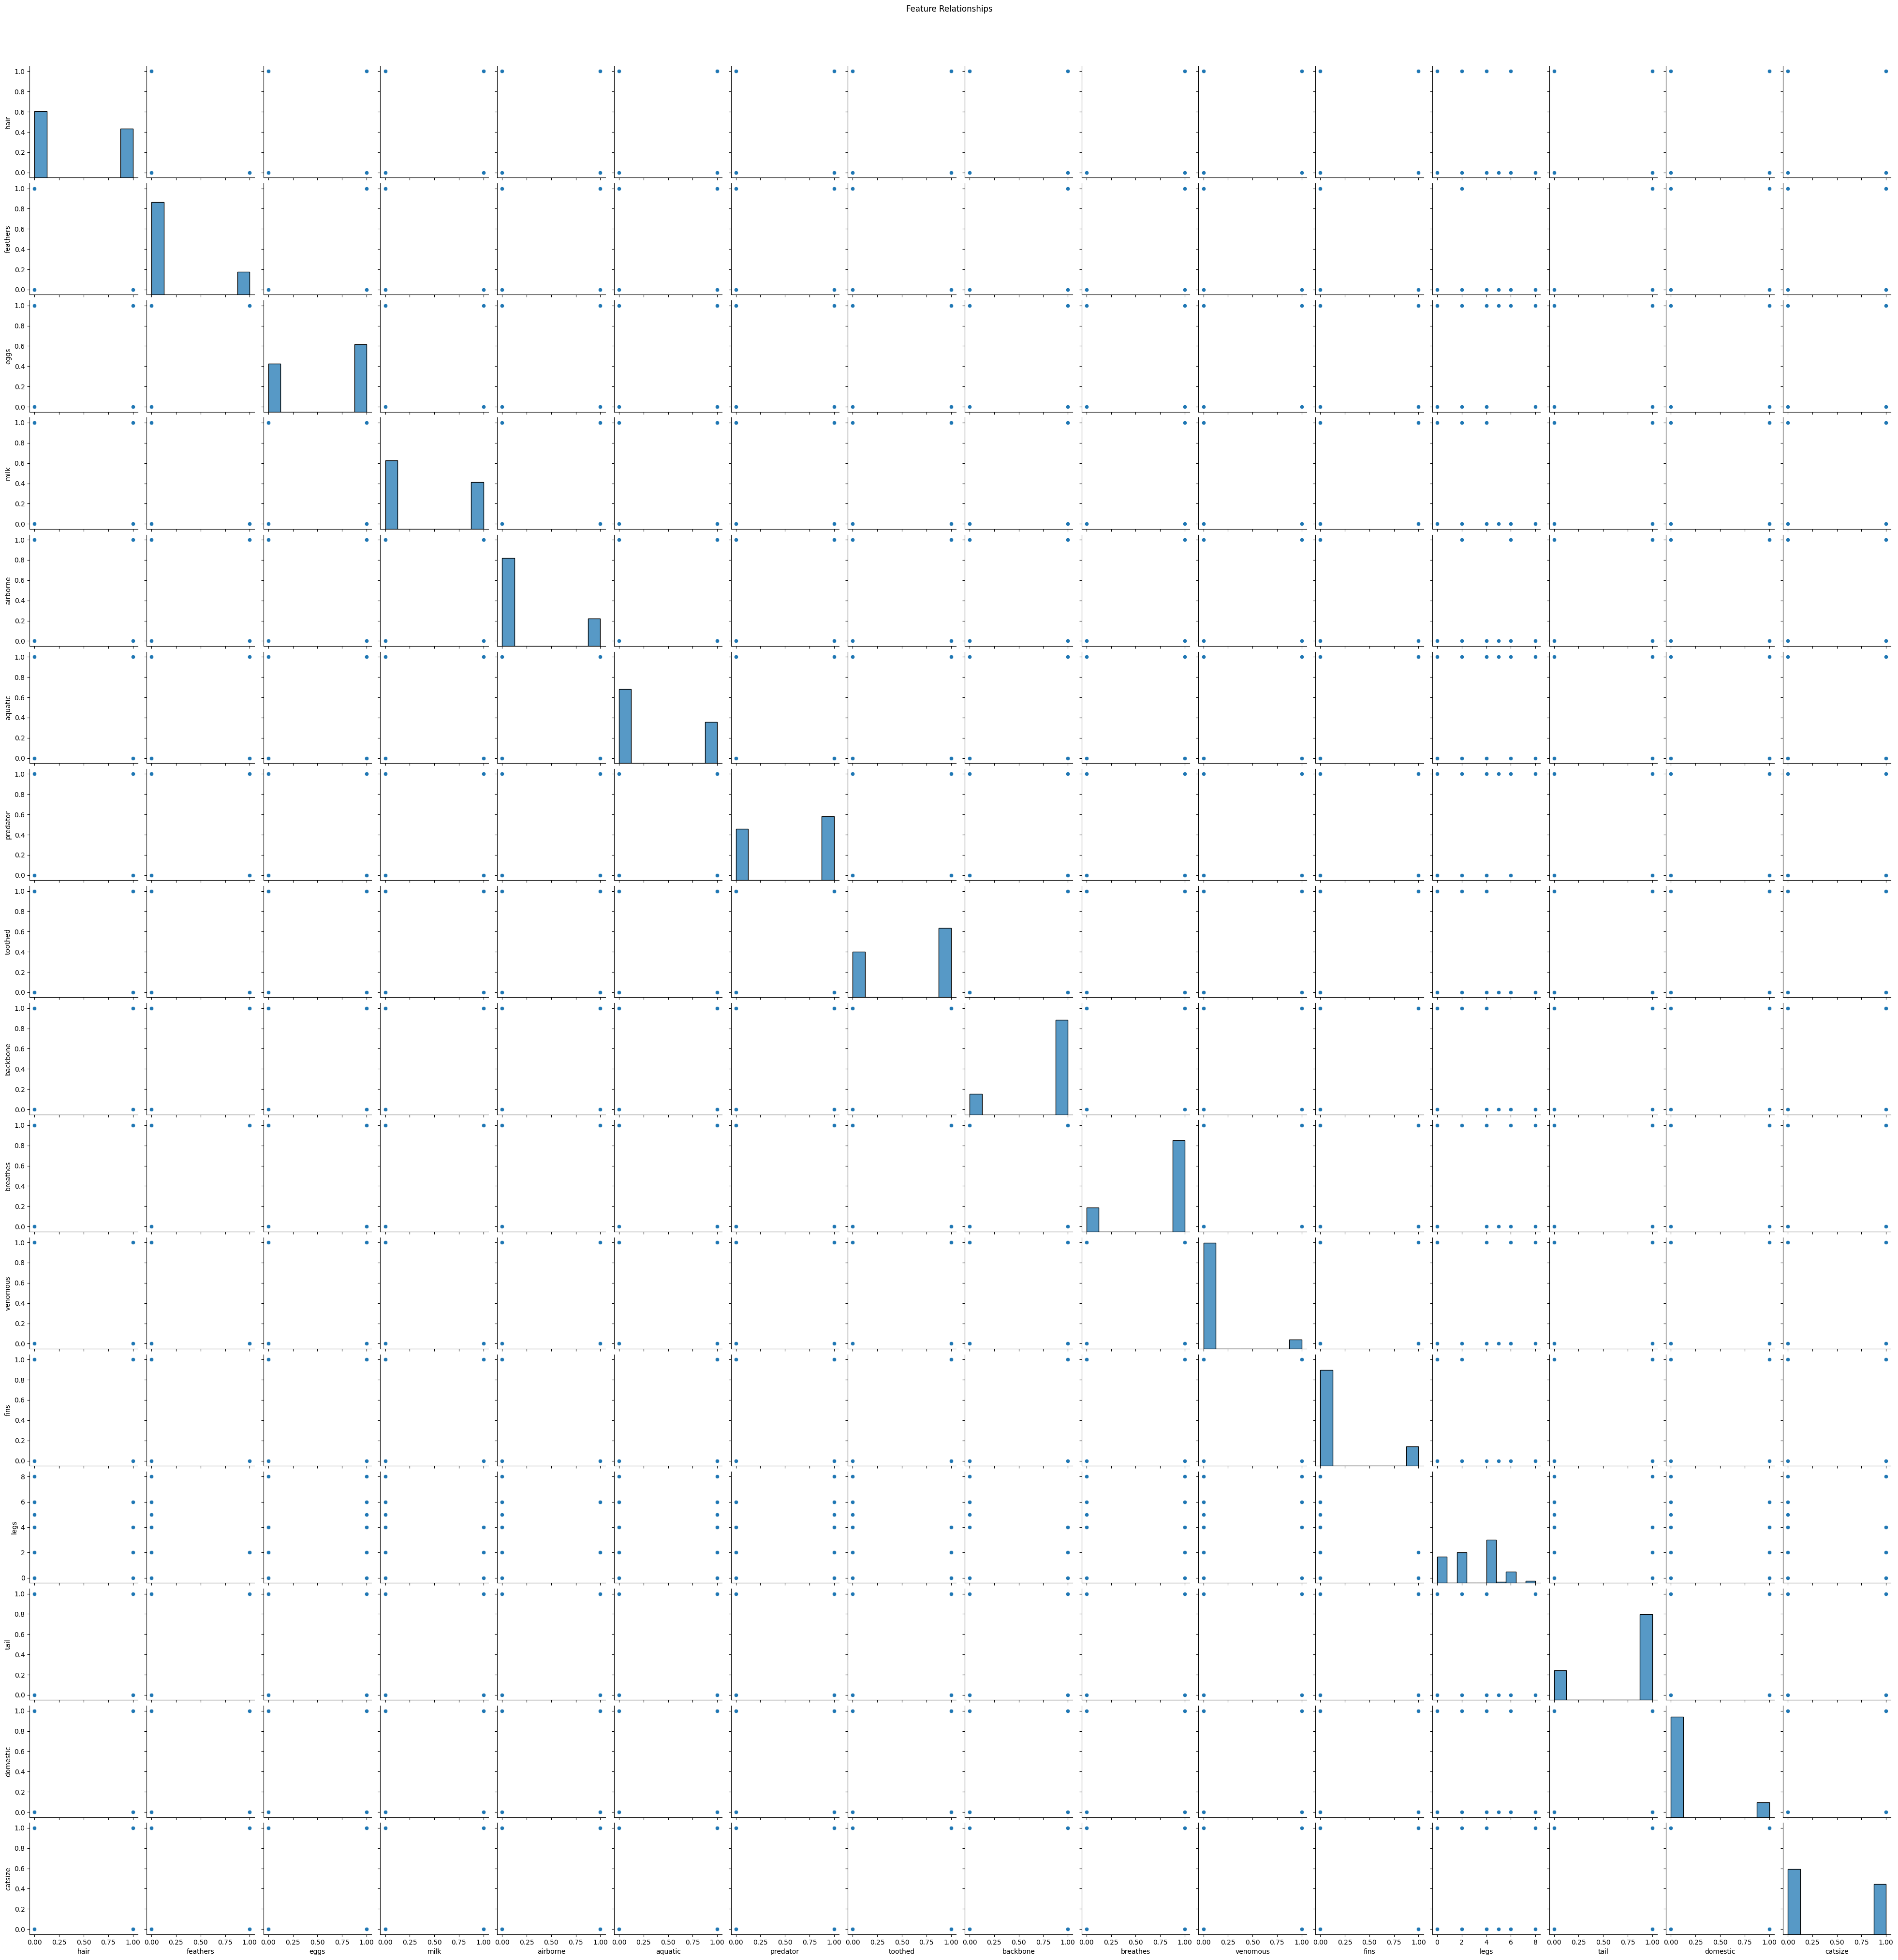

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

Accuracy Score: 0.9523809523809523


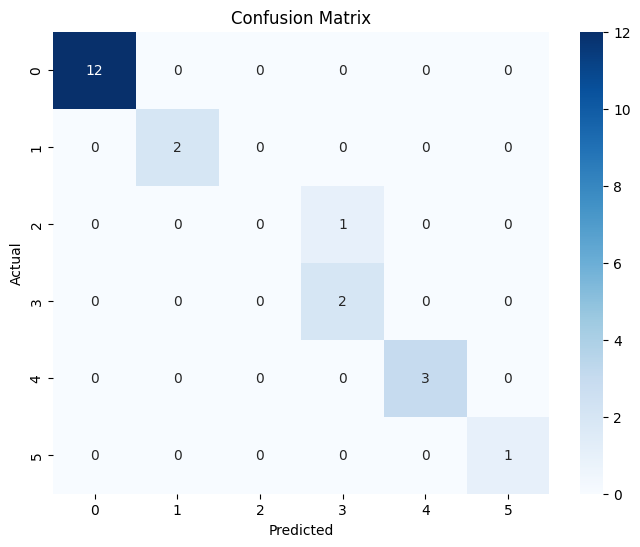

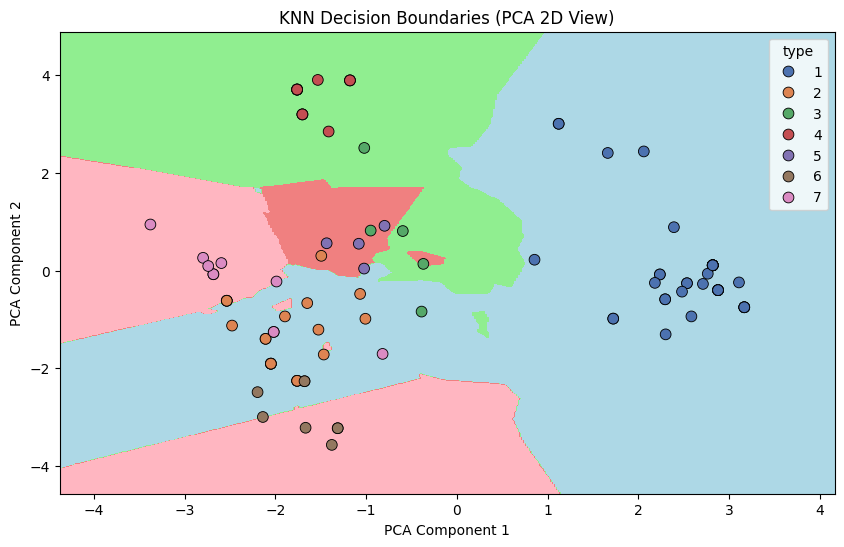

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# 2. Load Dataset
df = pd.read_csv("Zoo.csv")  # Replace with your dataset name

# 3. Basic EDA
print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df['type'].value_counts())

# 4. Data Visualization
sns.countplot(x='type', data=df)
plt.title("Distribution of Animal Types")
plt.show()

sns.pairplot(df.iloc[:, 1:-1])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

# 5. Data Preprocessing
X = df.drop(columns=['animal name', 'type'])  # Features
y = df['type']  # Target class

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Model Training with KNN
k = 5  # Chosen value for K
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Euclidean Distance
knn.fit(X_train, y_train)

# 8. Model Evaluation
y_pred = knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# 9. Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Visualizing Decision Boundary (Using PCA for 2D projection)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

knn_pca = KNeighborsClassifier(n_neighbors=k)
knn_pca.fit(X_train_pca, y_train)

# Plotting decision boundary
h = .02  # step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(('lightblue', 'lightgreen', 'lightcoral', 'lightpink')))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='deep', s=60, edgecolor='k')
plt.title("KNN Decision Boundaries (PCA 2D View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


n_neighbors: Number of neighbors to consider (K value).

metric: Distance metric used (e.g., Euclidean, Manhattan).

weights: Whether to weight all neighbors equally or by distance (e.g., 'uniform', 'distance').

p: Power parameter for the Minkowski metric (p=1: Manhattan, p=2: Euclidean).

Euclidean Distance (default, p=2)

Manhattan Distance (p=1)

Minkowski Distance (generalized version)

Cosine Similarity

Hamming Distance (for categorical data)